In [47]:
# Initial import all libraries and dependencies
import panel as pn
pn.extension('plotly')
import plotly.express as px
import datetime
import numpy as np
import pandas as pd
import hvplot.pandas
#from pandas_datareader import data
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import yfinance as yf
from finta import TA
from pathlib import Path

In [48]:
#pip install finta

In [49]:
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 2000)
pd.set_option('display.width', 1000)

In [50]:
#Define the instruments to download data of a stock/ETF .
tickers = "AAPL"

In [51]:
start_date=datetime.date(2016,1,1)
end_date=datetime.date(2021,12,31)
interval='1d'


In [52]:
yf.Tickers(tickers)
paned_data=yf.download(tickers,start=start_date,end=end_date,interval=interval)

[*********************100%***********************]  1 of 1 completed


In [53]:
display(paned_data.head())

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,25.652500,26.342501,25.500000,26.337500,24.220577,270597600
2016-01-05,26.437500,26.462500,25.602501,25.677500,23.613626,223164000
2016-01-06,25.139999,25.592501,24.967501,25.174999,23.151512,273829600
2016-01-07,24.670000,25.032499,24.107500,24.112499,22.174414,324377600
2016-01-08,24.637501,24.777500,24.190001,24.240000,22.291668,283192000


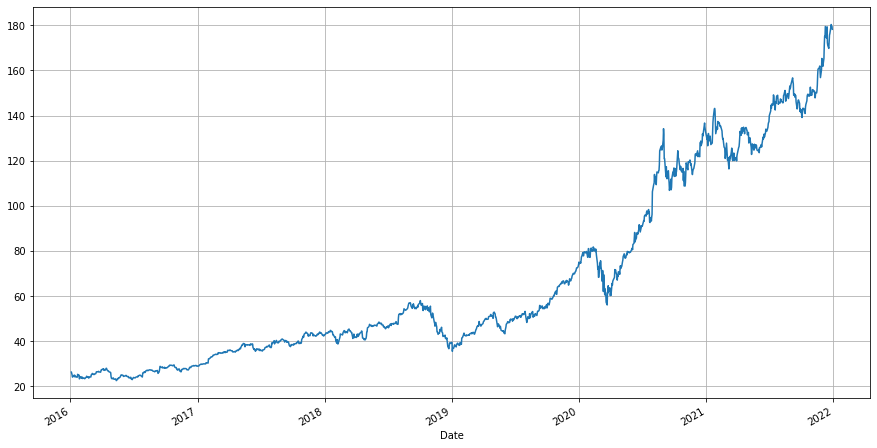

In [54]:
paned_data.Close.plot(figsize = (15, 8))
plt.grid()

In [55]:
signals_df=paned_data.copy()

In [56]:
# Set the short window and long windows
short_window = 50
long_window = 100

# Add the SMA technical indicators for the short and long windows
signals_df["Short"] = TA.SMA(signals_df, short_window)
signals_df["Long"] = TA.SMA(signals_df, long_window)

In [57]:
signals_df.iloc[90:110, :]

,Open,High,Low,Close,Adj Close,Volume,Short,Long
Date,,,,,,,,
2016-05-12,23.180000,23.195000,22.367500,22.584999,21.009535,305258800,25.86075,NaN
2016-05-13,22.500000,22.917500,22.500000,22.629999,21.051394,177571200,25.80585,NaN
2016-05-16,23.097500,23.597500,22.912500,23.469999,21.832796,245039200,25.76020,NaN
2016-05-17,23.637501,23.674999,23.252501,23.372499,21.742102,187667600,25.71830,NaN
2016-05-18,23.540001,23.802500,23.472500,23.639999,21.990940,168249600,25.68595,NaN
2016-05-19,23.660000,23.660000,23.392500,23.549999,21.907217,121768400,25.65135,NaN
2016-05-20,23.660000,23.857500,23.629999,23.805000,22.144432,128104000,25.62160,NaN
2016-05-23,23.967501,24.297501,23.917500,24.107500,22.425829,152074400,25.59245,NaN
2016-05-24,24.305000,24.522499,24.209999,24.475000,22.767694,140560800,25.56935,NaN


In [58]:
signals_df["Signal"] = 0.0

# Generate the trading signal 1 or 0,
# where 1 is when the Short window is greater than (or crosses over) the Long Window
# where 0 is when the Short window is under the Long window
signals_df["Signal"][short_window:] = np.where(
    signals_df["Short"][short_window:] > signals_df["Long"][short_window:], 1.0, 0.0
)

# Calculate the points in time at which a position should be taken, 1 or -1
signals_df["Entry/Exit"] = signals_df["Signal"].diff()

# Review the DataFrame
signals_df.iloc[95:105, :]

C:\Users\Admin\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Open,High,Low,Close,Adj Close,Volume,Short,Long,Signal,Entry/Exit
Date,,,,,,,,,,
2016-05-19,23.660000,23.660000,23.392500,23.549999,21.907217,121768400,25.65135,NaN,0.0,0.0
2016-05-20,23.660000,23.857500,23.629999,23.805000,22.144432,128104000,25.62160,NaN,0.0,0.0
2016-05-23,23.967501,24.297501,23.917500,24.107500,22.425829,152074400,25.59245,NaN,0.0,0.0
2016-05-24,24.305000,24.522499,24.209999,24.475000,22.767694,140560800,25.56935,NaN,0.0,0.0
2016-05-25,24.667500,24.934999,24.527500,24.905001,23.167702,152675200,25.54455,25.035825,1.0,1.0
2016-05-26,24.920000,25.182501,24.660000,25.102501,23.351421,225324800,25.51675,25.023475,1.0,0.0
2016-05-27,24.860001,25.117500,24.812500,25.087500,23.337469,145364800,25.48950,25.017575,1.0,0.0
2016-05-31,24.900000,25.100000,24.705000,24.965000,23.223513,169228800,25.45920,25.015475,1.0,0.0
2016-06-01,24.754999,24.885000,24.582500,24.615000,22.897924,116693200,25.42195,25.020500,1.0,0.0


In [59]:
signals_df=signals_df.dropna()

In [60]:
signals_df.head()

,Open,High,Low,Close,Adj Close,Volume,Short,Long,Signal,Entry/Exit
Date,,,,,,,,,,
2016-05-25,24.667500,24.934999,24.5275,24.905001,23.167702,152675200,25.54455,25.035825,1.0,1.0
2016-05-26,24.920000,25.182501,24.6600,25.102501,23.351421,225324800,25.51675,25.023475,1.0,0.0
2016-05-27,24.860001,25.117500,24.8125,25.087500,23.337469,145364800,25.48950,25.017575,1.0,0.0
2016-05-31,24.900000,25.100000,24.7050,24.965000,23.223513,169228800,25.45920,25.015475,1.0,0.0
2016-06-01,24.754999,24.885000,24.5825,24.615000,22.897924,116693200,25.42195,25.020500,1.0,0.0


In [61]:
# Visualize entry position relative to close price
entry = signals_df[signals_df["Entry/Exit"] == 1.0]["Close"].hvplot.scatter(
    color='green',
    marker='^',
    size=200,
    legend=False,
    ylabel='Price in $',
    width=1000,
    height=400
)

# Visualize exit position relative to close price
exit = signals_df[signals_df["Entry/Exit"] == -1.0]["Close"].hvplot.scatter(
    color='red',
    marker='v',
    size=200,
    legend=False,
    ylabel='Price in $',
    width=1000,
    height=400
)

# Visualize close price for the investment
security_close = signals_df[["Close"]].hvplot(
    line_color='lightgray',
    ylabel='Price in $',
    width=1000,
    height=400
)

# Visualize moving averages
moving_avgs = signals_df[["Short", "Long"]].hvplot(
    ylabel='Price in $',
    width=1000,
    height=400
)

# Overlay plots
entry_exit_plot = security_close * moving_avgs * entry * exit
entry_exit_plot

:Overlay
   .Curve.I          :Curve   [Date]   (Close)
   .NdOverlay.I      :NdOverlay   [Variable]
      :Curve   [Date]   (value)
   .Scatter.Close.I  :Scatter   [Date]   (Close)
   .Scatter.Close.II :Scatter   [Date]   (Close)

### Backtest the Trading Strategy


In [62]:
# Set the initial capital
initial_capital = float(100000)

# Set the share size
share_size = -500

# Take a 500 share position where the dual moving average crossover is 1 (SMA50 is greater than SMA100)
signals_df["Position"] = share_size * signals_df["Signal"]

# Find the points in time where a 500 share position is bought or sold
signals_df["Entry/Exit Position"] = signals_df["Position"].diff()

# Multiply share price by entry/exit positions and get the cumulatively sum
signals_df["Portfolio Holdings"] = (
    signals_df["Close"] * signals_df["Entry/Exit Position"].cumsum()
)

# Subtract the initial capital by the portfolio holdings to get the amount of liquid cash in the portfolio
signals_df["Portfolio Cash"] = (
    initial_capital - (signals_df["Close"] * signals_df["Entry/Exit Position"]).cumsum()
)

# Get the total portfolio value by adding the cash amount by the portfolio holdings (or investments)
signals_df["Portfolio Total"] = (
    signals_df["Portfolio Cash"] + signals_df["Portfolio Holdings"]
)

# Calculate the portfolio daily returns
signals_df["Portfolio Daily Returns"] = signals_df["Portfolio Total"].pct_change()

# Calculate the cumulative returns
signals_df["Portfolio Cumulative Returns"] = (
    1 + signals_df["Portfolio Daily Returns"]
).cumprod() - 1

# Print the DataFrame
signals_df.head()

,Open,High,Low,Close,Adj Close,Volume,Short,Long,Signal,Entry/Exit,Position,Entry/Exit Position,Portfolio Holdings,Portfolio Cash,Portfolio Total,Portfolio Daily Returns,Portfolio Cumulative Returns
Date,,,,,,,,,,,,,,,,,
2016-05-25,24.667500,24.934999,24.5275,24.905001,23.167702,152675200,25.54455,25.035825,1.0,1.0,-500.0,NaN,NaN,NaN,NaN,NaN,NaN
2016-05-26,24.920000,25.182501,24.6600,25.102501,23.351421,225324800,25.51675,25.023475,1.0,0.0,-500.0,0.0,0.0,100000.0,100000.0,NaN,NaN
2016-05-27,24.860001,25.117500,24.8125,25.087500,23.337469,145364800,25.48950,25.017575,1.0,0.0,-500.0,0.0,0.0,100000.0,100000.0,0.0,0.0
2016-05-31,24.900000,25.100000,24.7050,24.965000,23.223513,169228800,25.45920,25.015475,1.0,0.0,-500.0,0.0,0.0,100000.0,100000.0,0.0,0.0
2016-06-01,24.754999,24.885000,24.5825,24.615000,22.897924,116693200,25.42195,25.020500,1.0,0.0,-500.0,0.0,0.0,100000.0,100000.0,0.0,0.0


In [63]:
signals_df=signals_df.dropna()

### Plot Entry/Exit Points of Backtest Result

In [64]:
# Visualize exit positions relative to total portfolio value
entry = signals_df[signals_df["Entry/Exit"] == 1.0]["Portfolio Total"].hvplot.scatter(
    color='purple',
    marker='^',
    legend=False, 
    ylabel="Total Portfolio Value", 
    width=1000, 
    height=400
)

# Visualize entry positions relative to total portfolio value
exit = signals_df[signals_df["Entry/Exit"] == -1.0]["Portfolio Total"].hvplot.scatter(
    color='yellow',
    marker='v',
    legend=False, 
    ylabel="Total Portfolio Value", 
    width=1000, 
    height=400
)

# Visualize the total portoflio value for the investment
total_portfolio_value = signals_df[['Portfolio Total']].hvplot(
    line_color='lightgray',
    ylabel='Total Portfolio Value',
    width=1000,
    height=400
)

# Overlay the plots
portfolio_entry_exit_plot = total_portfolio_value * entry * exit
portfolio_entry_exit_plot.opts(
    title="VAQ Short-Position Algorithm - Total Portfolio Value",
    yformatter='%.0f'
)

:Overlay
   .Curve.I                    :Curve   [Date]   (Portfolio Total)
   .Scatter.Portfolio_Total.I  :Scatter   [Date]   (Portfolio Total)
   .Scatter.Portfolio_Total.II :Scatter   [Date]   (Portfolio Total)

## Step 2: Initialize a portfolio evaluation DataFrame

In [65]:
# Create the list of the metric names
metrics = [
    'Annualized Return',
    'Cumulative Returns',
    'Annual Volatility',
    'Sharpe Ratio',
    'Sortino Ratio'
]

# Create a list that holds the column name
columns = ['Backtest']

# Initialize the DataFrame with index set to evaluation metrics and columns 
portfolio_evaluation_df = pd.DataFrame(index=metrics, columns=columns)

# Review the DataFrame
portfolio_evaluation_df

,Backtest
Annualized Return,NaN
Cumulative Returns,NaN
Annual Volatility,NaN
Sharpe Ratio,NaN
Sortino Ratio,NaN


In [66]:
# Calculate the Annualized return metric
portfolio_evaluation_df.loc['Annualized Return'] = (
    signals_df['Portfolio Daily Returns'].mean() * 252
)

In [67]:
# Calculate the Cumulative returns metric
portfolio_evaluation_df.loc['Cumulative Returns'] = signals_df['Portfolio Cumulative Returns'][-1]

In [68]:
portfolio_evaluation_df.loc['Annual Volatility'] = (
    signals_df['Portfolio Daily Returns'].std() * np.sqrt(252)
)

In [69]:
portfolio_evaluation_df.loc['Sharpe Ratio'] = (
    signals_df['Portfolio Daily Returns'].mean() * 252) / (
    signals_df['Portfolio Daily Returns'].std() * np.sqrt(252)
)

In [70]:
# Calculate the Sortino ratio
# Start by calculating the downside return values

# Create a DataFrame that contains the Portfolio Daily Returns column
sortino_ratio_df = signals_df[['Portfolio Daily Returns']].copy()

# Create a column to hold downside return values
sortino_ratio_df.loc[:,'Downside Returns'] = 0

# Find Portfolio Daily Returns values less than 0, 
# square those values, and add them to the Downside Returns column
sortino_ratio_df.loc[sortino_ratio_df['Portfolio Daily Returns'] < 0, 
                     'Downside Returns'] = sortino_ratio_df['Portfolio Daily Returns']**2

# Calculate the annualized return value
annualized_return = sortino_ratio_df['Portfolio Daily Returns'].mean() * 252

# Calculate the annualized downside standard deviation value
downside_standard_deviation = np.sqrt(sortino_ratio_df['Downside Returns'].mean()) * np.sqrt(252)

# Divide the annualized return value by the downside standard deviation value
sortino_ratio = annualized_return/downside_standard_deviation

# Add the Sortino ratio to the evaluation DataFrame
portfolio_evaluation_df.loc['Sortino Ratio'] = sortino_ratio

In [71]:
# Review the portfolio evaluation DataFrame
portfolio_evaluation_df

,Backtest
Annualized Return,0.024059
Cumulative Returns,0.1397
Annual Volatility,0.036639
Sharpe Ratio,0.656658
Sortino Ratio,0.984904


In [72]:
# Initialize the trade evaluation DataFrame
trade_evaluation_df = pd.DataFrame(
    columns=[
        'Stock', 
        'Entry Date', 
        'Exit Date', 
        'Shares', 
        'Entry Share Price', 
        'Exit Share Price', 
        'Entry Portfolio Holding', 
        'Exit Portfolio Holding', 
        'Profit/Loss']
)

In [73]:
# Initialize the iterative variables
entry_date = ""
exit_date = ""
entry_portfolio_holding = 0.0
exit_portfolio_holding = 0.0
share_size = 0
entry_share_price = 0.0
exit_share_price = 0.0

# Loop through the signal DataFrame
# If `Entry/Exit` is 1, set entry trade metrics
# Else if `Entry/Exit` is -1, set exit trade metrics and calculate profit,
# Then append the record to the trade evaluation DataFrame
for index, row in signals_df.iterrows():
    if row['Entry/Exit'] == 1:
        entry_date = index
        entry_portfolio_holding = abs(row['Portfolio Holdings'])
        share_size = row['Entry/Exit Position']
        entry_share_price = row['Close']

    elif row['Entry/Exit'] == -1:
        exit_date = index
        exit_portfolio_holding = abs(row['Close'] * row['Entry/Exit Position'])
        exit_share_price = row['Close']
        profit_loss =  entry_portfolio_holding - exit_portfolio_holding
        trade_evaluation_df = trade_evaluation_df.append(
            {
                'Stock': 'AAPL',
                'Entry Date': entry_date,
                'Exit Date': exit_date,
                'Shares': share_size,
                'Entry Share Price': entry_share_price,
                'Exit Share Price': exit_share_price,
                'Entry Portfolio Holding': entry_portfolio_holding,
                'Exit Portfolio Holding': exit_portfolio_holding,
                'Profit/Loss': profit_loss
            },
            ignore_index=True)

# Review the DataFrame
trade_evaluation_df

,Stock,Entry Date,Exit Date,Shares,Entry Share Price,Exit Share Price,Entry Portfolio Holding,Exit Portfolio Holding,Profit/Loss
0,AAPL,,2016-06-14,0,0.000000,24.365000,0.0,12182.499886,-12182.499886
1,AAPL,2016-08-22 00:00:00,2018-03-26,-500.0,27.127501,43.192501,0.0,21596.250534,-21596.250534
2,AAPL,2018-04-19 00:00:00,2018-11-30,-500.0,43.200001,44.645000,0.0,22322.500229,-22322.500229
3,AAPL,2019-03-28 00:00:00,2019-07-22,-500.0,47.180000,51.805000,0.0,25902.500153,-25902.500153
4,AAPL,2019-07-29 00:00:00,2020-04-07,-500.0,52.419998,64.857498,0.0,32428.749084,-32428.749084
5,AAPL,2020-06-09 00:00:00,2021-04-09,-500.0,85.997498,133.000000,0.0,66500.000000,-66500.000000
6,AAPL,2021-06-09 00:00:00,2021-11-17,-500.0,127.129997,153.490005,0.0,76745.002747,-76745.002747
